In [1]:
import gzip
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import random, heapq

In [3]:
##############################################################
########### reading data into a pandas dataframe #############
data = []
userRatings = defaultdict(list)

def readGz(f):
    for l in gzip.open(f):
        yield eval(l)
#training and validation 
for l in readGz("train.json.gz"):
    data.append(l)

print "total number of reviews: " , (len(data))
df = pd.DataFrame.from_dict(data)


validation_neg_pairs = set()
for l in open("pairs_Purchase_neg.txt",'r'):
    if l.startswith("reviewerID"):
        #header
        continue
    u,i = l.strip().split('-')
    validation_neg_pairs.add((u,i))
    
print(len(validation_neg_pairs))

total number of reviews:  200000
100000


In [7]:
timeTable = df['reviewTime'].value_counts()

In [47]:
yearList = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']
yearCount = {}
for year in yearList:
    yearCount[year] = 0
    
for i in range(2529):
    for year in yearList:
        if (timeTable.index[i].split()[2] == year):
            yearCount[year] += int(timeTable[i])

In [48]:
print yearList
print yearCount

['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']
{'2003': 2, '2006': 70, '2007': 301, '2004': 4, '2005': 18, '2014': 73447, '2008': 583, '2009': 1140, '2011': 6725, '2010': 2365, '2013': 92406, '2012': 22939}


In [59]:
yearPairList

[('2003', 2),
 ('2004', 4),
 ('2005', 18),
 ('2006', 70),
 ('2007', 301),
 ('2008', 583),
 ('2009', 1140),
 ('2010', 2365),
 ('2011', 6725),
 ('2012', 22939),
 ('2013', 92406),
 ('2014', 73447)]

In [61]:
numList = []

for pair in yearPairList:
    numList.append(pair[1])
print numList


[2, 4, 18, 70, 301, 583, 1140, 2365, 6725, 22939, 92406, 73447]


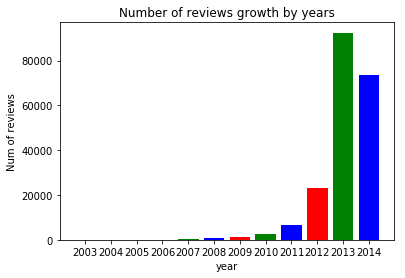

In [65]:
import matplotlib.pyplot as plt

plt.title("Number of reviews growth by years")
plt.xlabel("year")
plt.ylabel("Num of reviews")
plt.bar(range(len(yearList)), numList,color='rgb',tick_label=yearList)
plt.show()


In [69]:
ratingTable= df['rating'].value_counts()

In [79]:
ratingList = list(ratingTable)

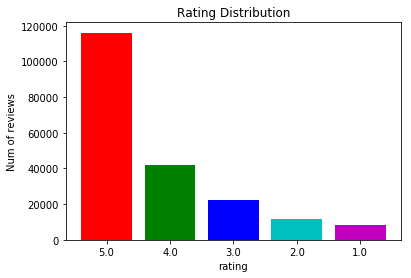

In [250]:
name = [1.0,2.0,3.0,4.0,5.0]
name.reverse()
plt.title("Rating Distribution")
plt.xlabel("rating")
plt.ylabel("Num of reviews")
plt.bar(range(len(name)), ratingList,color='rgbcm',tick_label=name)
plt.show()

In [173]:
priceTable = df['price'].value_counts()

In [174]:
count = 0
for key in priceTable:
     count += key
print count

74111


In [211]:
priceRange = ['(0,10]','(10,20]','(20,30]','(30,40]','(40+]']
pricebound = [0,10,20,30,40]
priceDict = {}

for price in pricebound:
    priceDict[price] = 0
    

In [212]:
print priceDict

{0: 0, 40: 0, 10: 0, 20: 0, 30: 0}


In [213]:
keys = priceTable.keys()
counter = 0

for price in keys:
    for j in range(4):
        if (price > pricebound[j] and price < pricebound[j+1]):
            priceDict[ pricebound[j] ] += int(priceTable[price])
            counter += int(priceTable[price]) 
            
print priceDict
print (counter)

{0: 24461, 40: 0, 10: 20242, 20: 12264, 30: 6444}
63411


In [214]:
priceDict[40] = 74111 - 63411
print priceDict

{0: 24461, 40: 10700, 10: 20242, 20: 12264, 30: 6444}


In [218]:
pricePair = []
for i in priceDict:
    pricePair.append( (i,priceDict[i]) )
pricePair.sort()

In [219]:
print pricePair

[(0, 24461), (10, 20242), (20, 12264), (30, 6444), (40, 10700)]


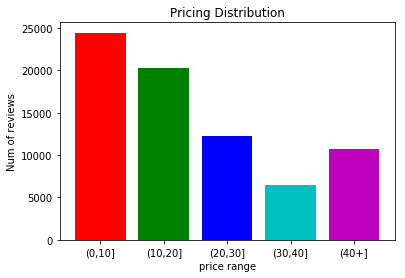

In [246]:
temp = [24461,20242,12264,6444,10700]
plt.title("Pricing Distribution")
plt.xlabel("price range")
plt.ylabel("Num of reviews")
plt.bar(range(len(priceRange)), temp,color='rgbcm',tick_label=priceRange)
plt.show()

In [235]:
df.categoryID.value_counts()

0    141398
1     51416
4      2976
2      2329
3      1881
Name: categoryID, dtype: int64

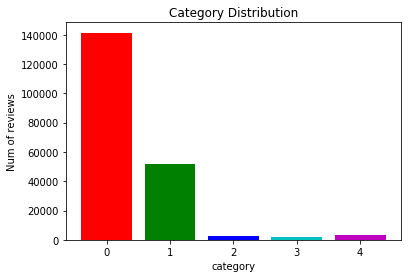

In [249]:
temp = [0,1,2,3,4]
Category_num = [141398,51416,2329, 1881,2976]

plt.title("Category Distribution")
plt.xlabel("category")
plt.ylabel("Num of reviews")
plt.bar(range(5), Category_num,color='rgbcm',tick_label=temp)
plt.show()

## review recomended

In [4]:
df['helpful'].head()

0    {u'nHelpful': 0, u'outOf': 0}
1    {u'nHelpful': 0, u'outOf': 0}
2    {u'nHelpful': 0, u'outOf': 0}
3    {u'nHelpful': 0, u'outOf': 0}
4    {u'nHelpful': 1, u'outOf': 1}
Name: helpful, dtype: object

In [5]:
helpfulDict = df['helpful'].value_counts()

print helpfulDict.head()

{u'nHelpful': 0, u'outOf': 0}    136935
{u'nHelpful': 1, u'outOf': 1}     21673
{u'nHelpful': 0, u'outOf': 1}      6906
{u'nHelpful': 2, u'outOf': 2}      6605
{u'nHelpful': 1, u'outOf': 2}      4719
Name: helpful, dtype: int64


In [42]:
rateList =[]

for idx in range(len(helpfulDict)):
    if helpfulDict.index[idx]['outOf']is not 0:
        rate = float(helpfulDict.index[idx]['nHelpful'])/float(helpfulDict.index[idx]['outOf'])
        rateList.append(rate)

In [43]:
len(rateList)

764

In [44]:
rateList.sort()

In [45]:
namelist = ['[0,0.2}','[0.2,0.4)','[0.4,0.6)','[0.6,0.8)','[0.8,1.0]',]
tempList = [0, .2, .4, .6, .8]
rateNumberList = [0,0,0,0,0]

for rate in rateList:
    for j in range(4):
        if (rate >= tempList[j] and rate < tempList[j+1]):
            rateNumberList[j] += 1
    

In [47]:
print rateNumberList

[51, 35, 31, 114, 0]


In [48]:
rateNumberList[4] = (533)

In [49]:
print rateNumberList

[51, 35, 31, 114, 533]


In [ ]:


plt.title("Recommended by Others Distribution")
plt.xlabel("category")
plt.ylabel("Num of reviews")
plt.bar(range(5), Category_num,color='rgbcm',tick_label=namelist)
plt.show()

In [3]:
import matplotlib.pyplot as plt

name = [ "Base",'Bayes', 'Logistic',  'LinearSVC', 'KNN', 'Latent Factor']
Accuracy = [0.3993, 0.5237, 0.6563, 0.6440, 0.5809, 0.4306]


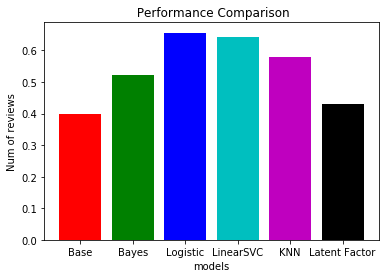

In [8]:

plt.title(" Performance Comparison")
plt.xlabel("models")
plt.ylabel("Num of reviews")
plt.bar(range(6), Accuracy,color='rgbcmk',tick_label=name)
plt.show()